# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the MD/MC code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

ene = np.loadtxt("MDNVE_MCNVT/op_EpotInst.dat");
M=500000
#mean = np.mean(ene)
tmax = 50
sel = np.zeros(tmax)
for i in range(tmax):
    sel[i] = ene[i*int(M/tmax)]
#-0.86, -1.72
var = np.var(sel)

acor = np.zeros(tmax)
mean1, mean2, mean3 = 0, 0, 0

for t in range(tmax):
    mean1, mean2, mean3 = 0.0, 0.0, 0.0
    diff = tmax - t
    for j in range(diff):
        #print(diff)
        mean1 += sel[j]*sel[j+t]/diff
        mean2 += sel[j]/diff
        mean3 += sel[j+t]/diff
    #print(mean1, mean2*mean3)
    acor[t] = (mean1-mean2*mean3)/(var)
x = np.arange(tmax)


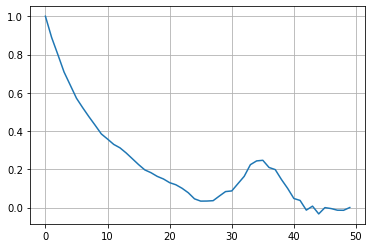

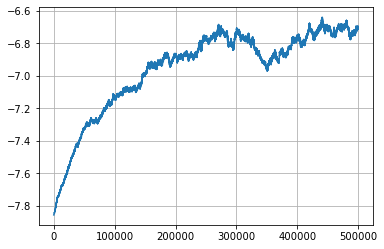

In [11]:
plt.errorbar(x,acor,yerr=0)
plt.grid(True)
plt.show()
x = np.arange(M)
plt.errorbar(x,ene,yerr=0)
plt.grid(True)
plt.show()

In [13]:
L = np.linspace(10, 5000, div)
div = range(L)
unc = np.zeros(div)
for i in range(div):
    N = int(M/div)
    medie = np.zeros(N)
    for j in range(N):
        medie[j] = np.mean(ene[j:int(L[i])])
    unc = np.var(medie)
plt.errorbar(L,unc,yerr=0)
plt.grid(True)
plt.show()

NameError: name 'div' is not defined

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

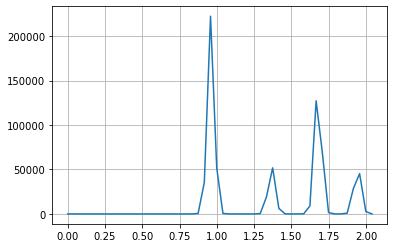

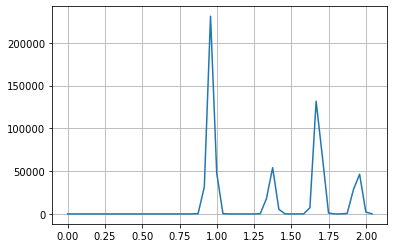

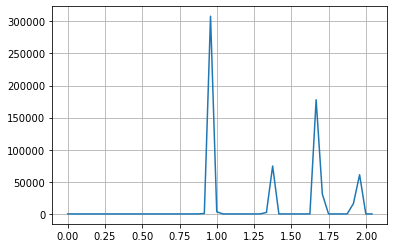

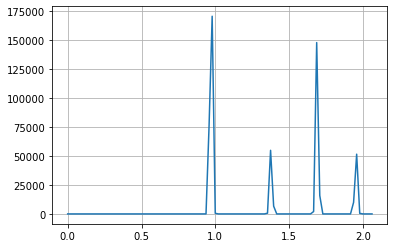

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
gr = np.loadtxt("MDNVE_MCNVT/gr.dat");
x = np.arange(50)
plt.errorbar(x/50*4.16329/2,gr[:50],yerr=0)
plt.grid(True)
plt.show()
plt.errorbar(x/50*4.16329/2,gr[50:100],yerr=0)
plt.grid(True)
plt.show()
plt.errorbar(x/50*4.16329/2,gr[100:150],yerr=0)
plt.grid(True)
plt.show()
x = np.arange(100)
plt.errorbar(x/50*4.16329/4,gr[150:],yerr=0)
plt.grid(True)
plt.show()

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>